# Data Cleaning and Exploratory Data Analysis Project
A project to perform data cleaning tasks, such as detection, treatment, transformation, and data visualization.

The "Vehicle Dataset 2024" dataset was found through Kaggle.com and is available under the ODC Attribution License. https://www.kaggle.com/datasets/kanchana1990/vehicle-dataset-2024

## Dataset Variables
- `name`: The full name of the vehicle, including make, model, and trim.
- `description`: A brief vehicle description, often including key features and selling points.
- `make`: The vehicle manufacturer (Ford, Toyota, BMW).
- `model`: The model name of the vehicle.
- `type`: The type of the vehicle, which is "New" for all entries in this dataset.
- `year`: The year the vehicle was manufactured.
- `price`: The price of the vehicle in USD.
- `engine`: Details about the engine, including type and specifications.
- `cylinders`: The number of cylinders in the vehicle's engine.
- `fuel`: The type of fuel the vehicle uses (Gasoline, Diesel, Electric).
- `mileage`: The vehicle's mileage, typically in miles.
- `transmission`: The transmission type (Automatic, Manual).
- `trim`: The trim level of the vehicle, indicating different feature sets or packages.
- `body`: The vehicle's body style (SUV, Sedan, Pickup Truck).
- `doors`: The number of doors on the vehicle.
- `exterior_color`: The exterior color of the vehicle.
- `interior_color`: The interior color of the vehicle.
- `drivetrain`: The vehicle's drivetrain (All-wheel Drive, Front-wheel Drive)

# Import Libraries and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore') 


In [2]:
##-- Import Dataset --##
vehicle_df = pd.read_csv('dataset/vehicles_dataset.csv')

vehicle_df.info()
vehicle_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Data Cleaning
## Detection of Duplicate Rows

In [3]:
# Detection of duplicates.
duplicates = vehicle_df.duplicated()  
dupl_counts = duplicates.value_counts() 

print(f'Total duplicate rows: {duplicates.sum()} \n')
print(f'True vs. False counts: \n {dupl_counts}')


Total duplicate rows: 24 

True vs. False counts: 
 False    978
True      24
Name: count, dtype: int64


### Inspection of Duplicate Rows
24 Rows were found to be duplicate.

In [11]:
##-- Subset duplicate rows
vehicle_df[vehicle_df.duplicated(keep=False)].sort_values('description').head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
304,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
637,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
398,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,New,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
206,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,New,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
158,2023 Dodge Charger SXT,\n \n F8 Green exterior and Black ...,Dodge,Charger,New,2023,37490.0,24V MPFI DOHC,6.0,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4.0,Green,Black,Rear-wheel Drive


## Treatment of Duplicate Rows
Extracting the duplicate rows into a separate dataset makes sense. The `description` variable can be valuable for an analysis that uses Natural Language Processing techniques for a future study. After all other variables have been treated or transformed, these variables will be extracted into a separate dataset.

## Detection of Missing Values

Total count of missing values: 283
name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64
Data Sparsity: 0.015690840541139943


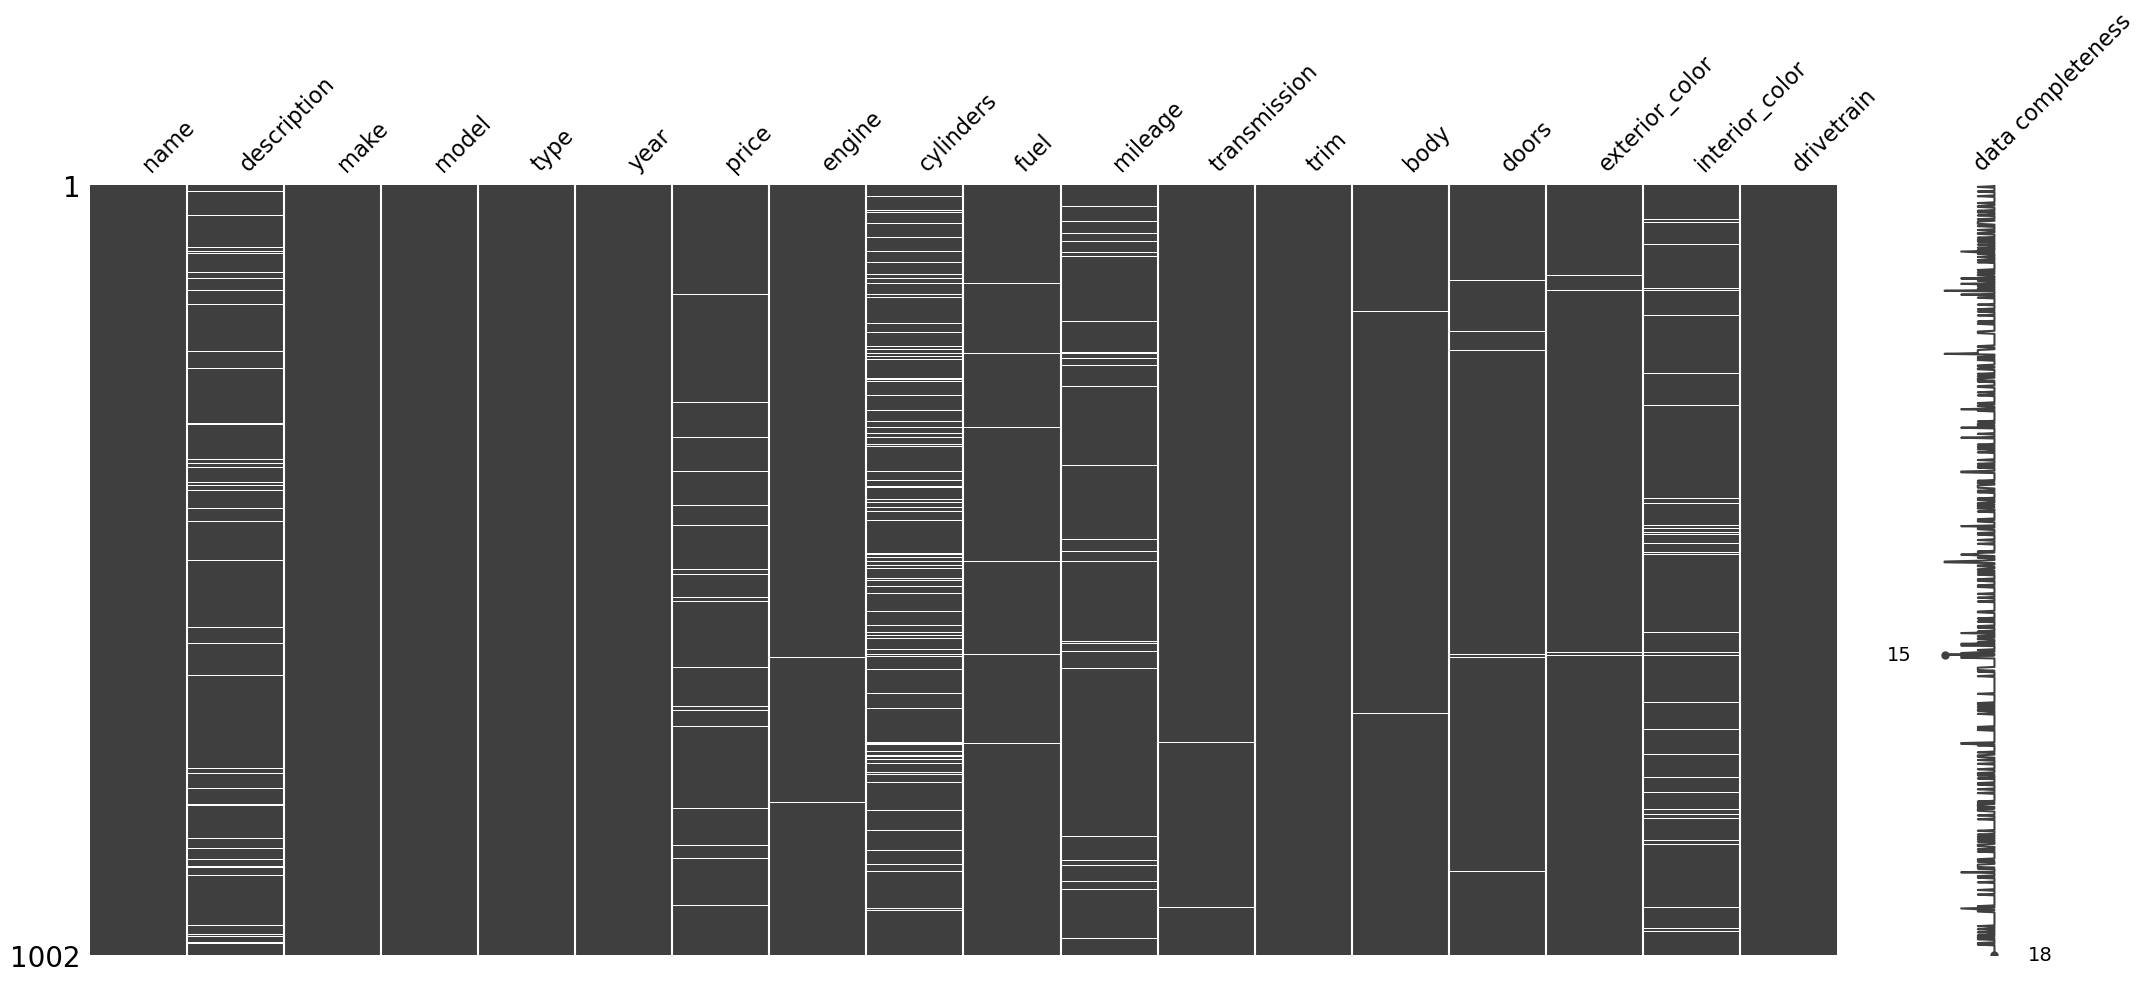

In [12]:
##-- Detection of missing values --##
print(f'Total count of missing values: {vehicle_df.isna().sum().sum()}')
print(vehicle_df.isna().sum())  # Generates the count of missing values per column.

##-- Visualization of missing values --##
print(f'Data Sparsity: {vehicle_df.isna().sum().sum() / (vehicle_df.shape[0] * vehicle_df.shape[1])}')
msno.matrix(vehicle_df, labels=True)
plt.show()

## Treatment of Missing Values
**Variables with Missing Values**:
- `description`: 56 missing,
- `price`: 23 missing,
- `engine`: 2 missing,
- `cylinders`: 105 missing,
- `fuel`: 7 missing,
- `mileage`: 34 missing,
- `transmission`: 2 missing,
- `trim`: 1 missing,
- `body`: 3 missing,
- `doors`: 7 missing,
- `exterior_color`: 5 missing, and
- `interior_color`: 38 missing.

283 total missing values present in the dataset with a **Data Sparsity** of < 2%.

### 